In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib, pandas as pd
!pip install xlrd

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_excel("E:/OAG PREDECTION/forecast1/FUR/oag/OAG.xls")
df.head(5)

,BUREAU,NoOfDaysTakenConsumerFrauds,YEAR
0,Consumer Frauds,20,2007-01-01
1,Consumer Frauds,20,2007-02-01
2,Consumer Frauds,21,2007-03-01
3,Consumer Frauds,22,2007-04-01
4,Consumer Frauds,22,2007-05-01


In [5]:
oag= df.loc[df['BUREAU'] == 'Consumer Frauds']

In [6]:
oag['YEAR'].min(), oag['YEAR'].max()

(Timestamp('2007-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00'))

In [7]:
cols = ['BUREAU']
oag.drop(cols, axis=1, inplace=True)
oag   = oag.sort_values('YEAR')

oag.isnull().sum()

NoOfDaysTakenConsumerFrauds    0
YEAR                           0
dtype: int64

In [8]:
oag = oag.groupby('YEAR')['NoOfDaysTakenConsumerFrauds'].mean().reset_index()

In [9]:
oag.head()

,YEAR,NoOfDaysTakenConsumerFrauds
0,2007-01-01,20
1,2007-02-01,20
2,2007-03-01,21
3,2007-04-01,22
4,2007-05-01,22


In [10]:
oag = oag.set_index('YEAR')
oag.index

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='YEAR', length=132, freq=None)

In [11]:
y = oag['NoOfDaysTakenConsumerFrauds'].resample('MS').mean()
y


YEAR
2007-01-01     20
2007-02-01     20
2007-03-01     21
2007-04-01     22
2007-05-01     22
2007-06-01     22
2007-07-01     22
2007-08-01     23
2007-09-01     24
2007-10-01     24
2007-11-01     25
2007-12-01     25
2008-01-01     25
2008-02-01     26
2008-03-01     26
2008-04-01     26
2008-05-01     27
2008-06-01     27
2008-07-01     27
2008-08-01     27
2008-09-01     28
2008-10-01     28
2008-11-01     29
2008-12-01     29
2009-01-01     29
2009-02-01     30
2009-03-01     30
2009-04-01     30
2009-05-01     30
2009-06-01     30
             ... 
2015-07-01     65
2015-08-01     65
2015-09-01     65
2015-10-01     66
2015-11-01     66
2015-12-01     68
2016-01-01     70
2016-02-01     73
2016-03-01     73
2016-04-01     74
2016-05-01     75
2016-06-01     76
2016-07-01     77
2016-08-01     79
2016-09-01     80
2016-10-01     80
2016-11-01     85
2016-12-01     85
2017-01-01     88
2017-02-01     89
2017-03-01     91
2017-04-01     97
2017-05-01     98
2017-06-01    103
2017-

In [12]:
y['2007':]

YEAR
2007-01-01     20
2007-02-01     20
2007-03-01     21
2007-04-01     22
2007-05-01     22
2007-06-01     22
2007-07-01     22
2007-08-01     23
2007-09-01     24
2007-10-01     24
2007-11-01     25
2007-12-01     25
2008-01-01     25
2008-02-01     26
2008-03-01     26
2008-04-01     26
2008-05-01     27
2008-06-01     27
2008-07-01     27
2008-08-01     27
2008-09-01     28
2008-10-01     28
2008-11-01     29
2008-12-01     29
2009-01-01     29
2009-02-01     30
2009-03-01     30
2009-04-01     30
2009-05-01     30
2009-06-01     30
             ... 
2015-07-01     65
2015-08-01     65
2015-09-01     65
2015-10-01     66
2015-11-01     66
2015-12-01     68
2016-01-01     70
2016-02-01     73
2016-03-01     73
2016-04-01     74
2016-05-01     75
2016-06-01     76
2016-07-01     77
2016-08-01     79
2016-09-01     80
2016-10-01     80
2016-11-01     85
2016-12-01     85
2017-01-01     88
2017-02-01     89
2017-03-01     91
2017-04-01     97
2017-05-01     98
2017-06-01    103
2017-

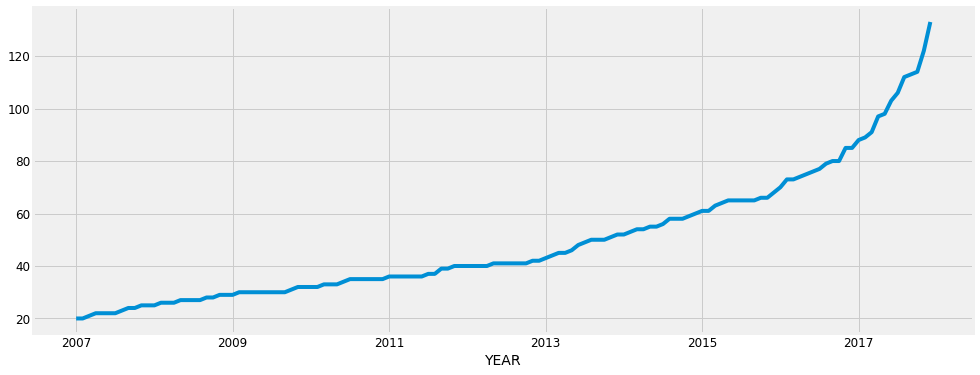

In [13]:
y.plot(figsize=(15, 6))
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1929.637810408949
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1768.2734859923655
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1324.3362305321189
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1034.6166543914464
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1295.182801399672
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1254.454312332127
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1015.7505641109636
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:991.1835428430394
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1743.8248314249022
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1473.0450962430136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1162.2310797550385
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:892.9230350930939
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1147.9714479316474
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1105.8477817383484
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:904.8833859454726
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:885.5361722286841
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:895.410695005342
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:803.091965133046
ARI

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1115      0.013     87.834      0.000       1.087       1.136
ma.L1         -0.9707      0.034    -28.212      0.000      -1.038      -0.903
ar.S.L12      -0.6046      0.085     -7.129      0.000      -0.771      -0.438
sigma2         1.6913      0.187      9.044      0.000       1.325       2.058


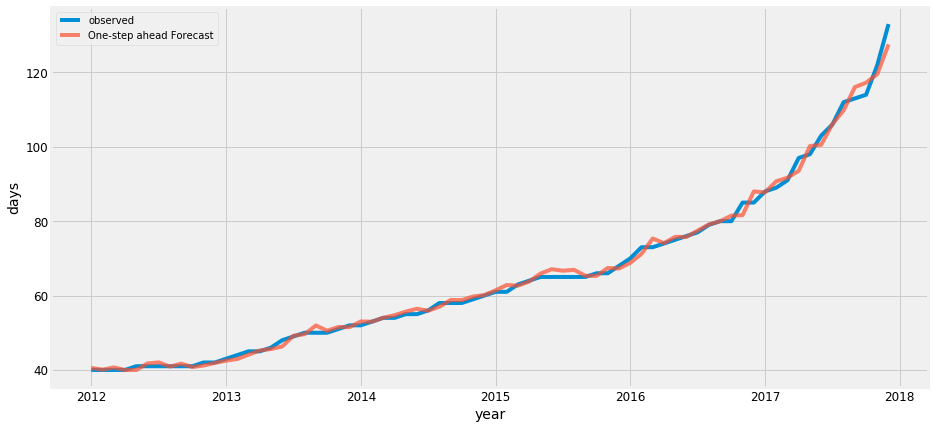

In [16]:
pred = results.get_prediction(start=pd.to_datetime('01-01-2012'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

'''ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)'''

ax.set_xlabel('year')
ax.set_ylabel('days')
plt.legend()

plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['01-01-2012':]

mse = ((y_forecasted - y_truth) ** 2).mean()



print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Root Mean Squared Error of our forecasts is 1.49
2.231582953498502


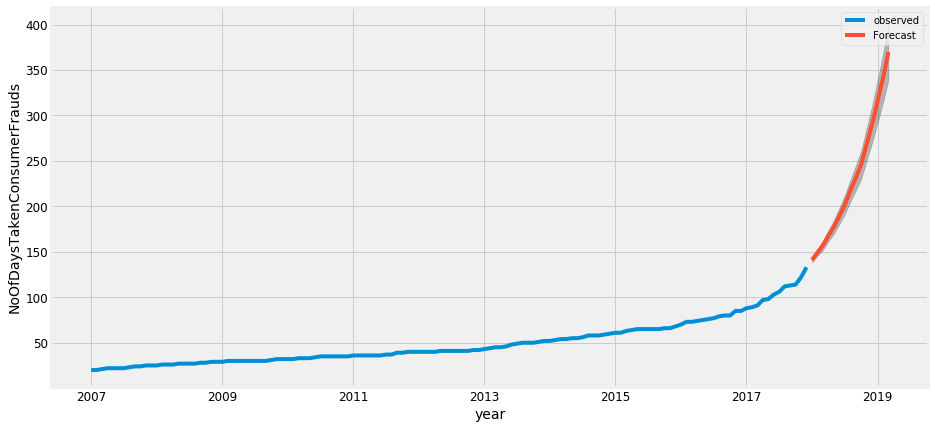

In [26]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
b=pred_uc.predicted_mean
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('year')
ax.set_ylabel('NoOfDaysTakenConsumerFrauds')

siva=pred_uc.predicted_mean

plt.legend()
plt.show()
print(pred_uc)

In [20]:
siva.to_csv("E:/OAG PREDECTION/forecast1/FUR/oag ConsumerFraudsoutputforecast.csv")

In [32]:
print(pred_uc.predicted_mean)

2018-01-01    140.974080
2018-02-01    149.384282
2018-03-01    157.067521
2018-04-01    167.705571
2018-05-01    177.221290
2018-06-01    189.268218
2018-07-01    201.580125
2018-08-01    216.856193
2018-09-01    230.855139
2018-10-01    245.699234
2018-11-01    267.945534
2018-12-01    290.145931
2019-01-01    314.954915
2019-02-01    340.940096
2019-03-01    369.702382
Freq: MS, dtype: float64
